Project: Wine Quality Prediction using Machine Learning

Inspiration:
Use machine learning to determine which physiochemical properties make a wine 'good'!

We are going to build a wine quality prediction system using machine learning that can predict the quality of the wine using some chemical parameters.


Business Understanding:

Consider there is the wine manufacturing company that want to create a new brand of wine and they want to find the quality of the wine using several chemical parameters like acidity, citric acid content, sugar content etc.
We are going to build a machine learning system that can take all these chemical values or chemical parameters and based on that it predicts whether the quality of the wine is good or not or how good the quality of wine is.


Workflow we are going to follow:

Data Analysis:

We have several values or several parameters in this dataset so we need to find which parameters are important for having the quality of the wine as ‘good’.
There can be several relationships between various features of the dataset. For example, we will be analysing the values on citric acid content, acidity etc. So, we need to find what is the relationship between this citric acid content and quality of the wine.
Then we need to check whether the quality increases if we increase the citric acid content and other such kind of things.
These things will be done in data analysis part.

And we will also use some visualizing techniques like plots and graphs to understand more about data. This part is known as data analysis. This data analysis part gives a better understanding about the dataset we have.

Data Pre-processing:

Once we have analysed the wine dataset, we will pre-process the data.
We cannot feed the raw data to our machine learning model and for that we need to do some processing so that it becomes compatible with our machine learning model.

Once we process the data there is another important step called as train test split.
In this particular step we will split the original dataset into training data and test data.
The reason for this is we will train our machine learning model using this training data. We won’t show the test data to our machine learning model while training. This data will be used to evaluate our model to find how good our model is performing.
So, this is the reason for splitting the data into training and test, where training data is used to train the model that will learn from the data and, the test data is used to evaluate or test the model.

Modelling:

Further we will feed this training data to our machine learning model.
In this case we’re going to use a logistic regression, decision tree as well as random forest model. These are some of the most important supervised learning algorithms in machine learning.

Model Evaluation:

Once we have trained these models, we’ll evaluate them based on our test data. It gives us the accuracy score or performance metrics of our machine learning model. Based on the accuracy scores, we’ll select the best one.
As we have a trained model, now what happens is when you give new data (those chemical parameters), this trained model can predict the quality of the wine.


# Importing the Libraries

In [1]:
import numpy as np #to create numpy arrays
import pandas as pd #to create pandas dataframe
import matplotlib.pyplot as plt #for making plots and graphs
import seaborn as sns #for data visualization
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split #to split data into training data and testing data
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score #to evaluate the model

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Collection

In [2]:
#loading the dataset to a pandas dataframe
wine_dataset = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [3]:
#checking the first 5 rows of the dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#checking number of rows and columns in the dataset
wine_dataset.shape

(1599, 12)

In [5]:
#getting some information about the dataset
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#checking for missing values in each column
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

> We don't have any missing values in our dataset.

# Data Analysis and Visualization

In [7]:
#getting statistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


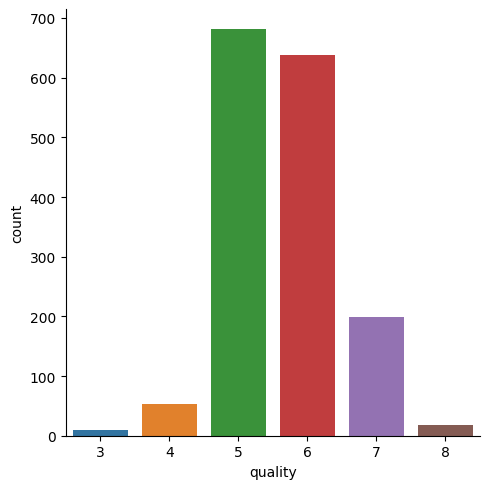

In [8]:
#finding the number of values for each quality
sns.catplot(x="quality", data=wine_dataset, kind="count")

<AxesSubplot: xlabel='quality', ylabel='volatile acidity'>

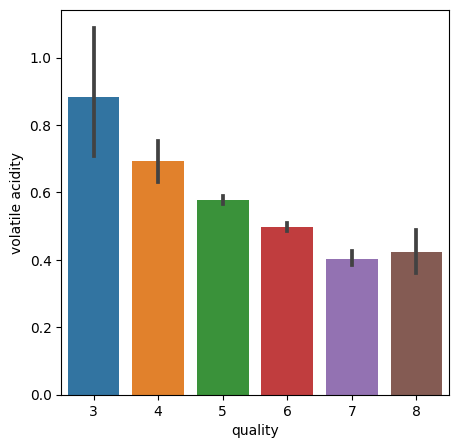

In [9]:
#volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x="quality", y="volatile acidity", data=wine_dataset)

> 'volatile acidity' and 'quality' are inversely proportional.

<AxesSubplot: xlabel='quality', ylabel='citric acid'>

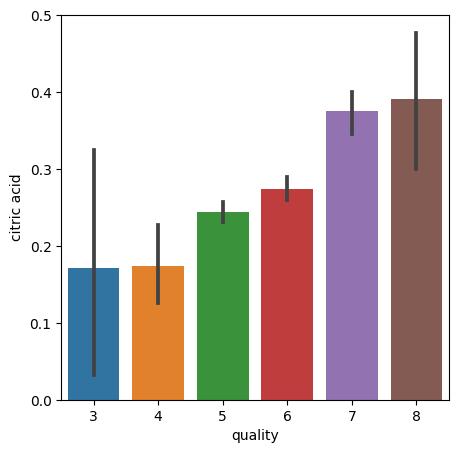

In [10]:
#citric acid vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x="quality", y="citric acid", data=wine_dataset)

> Here, when the 'citric acid' content is more then we're getting high 'quality' of wine.

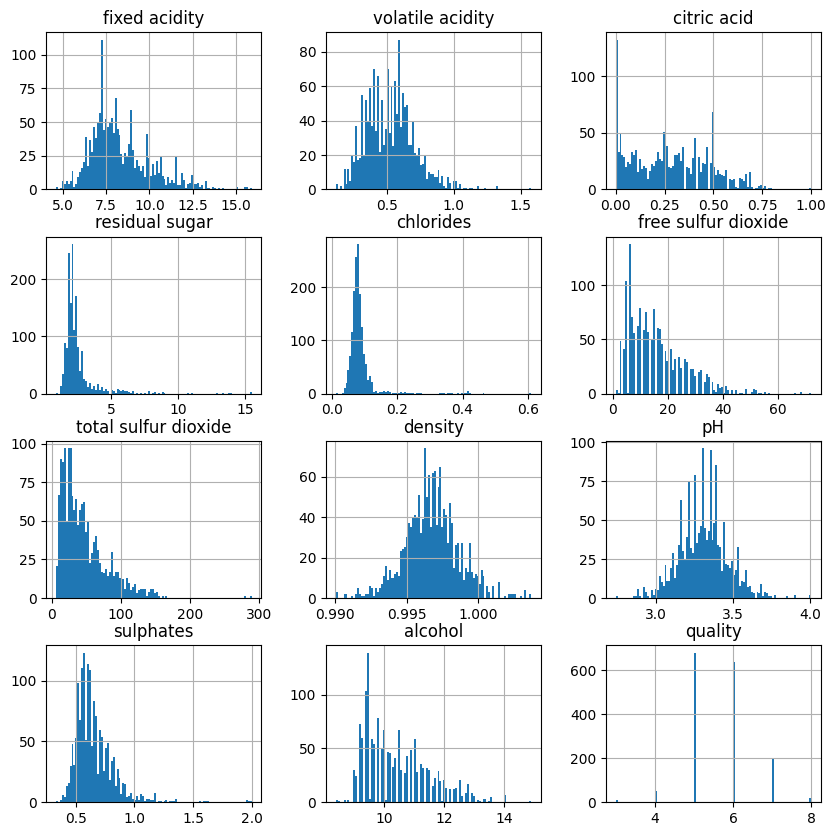

In [11]:
#checking the distribution of the data
wine_dataset.hist(bins=100, figsize=(10,10))
plt.show()

# Correlation

In [12]:
#correlation between all the columns to the quality column
correlation = wine_dataset.corr()

<AxesSubplot: >

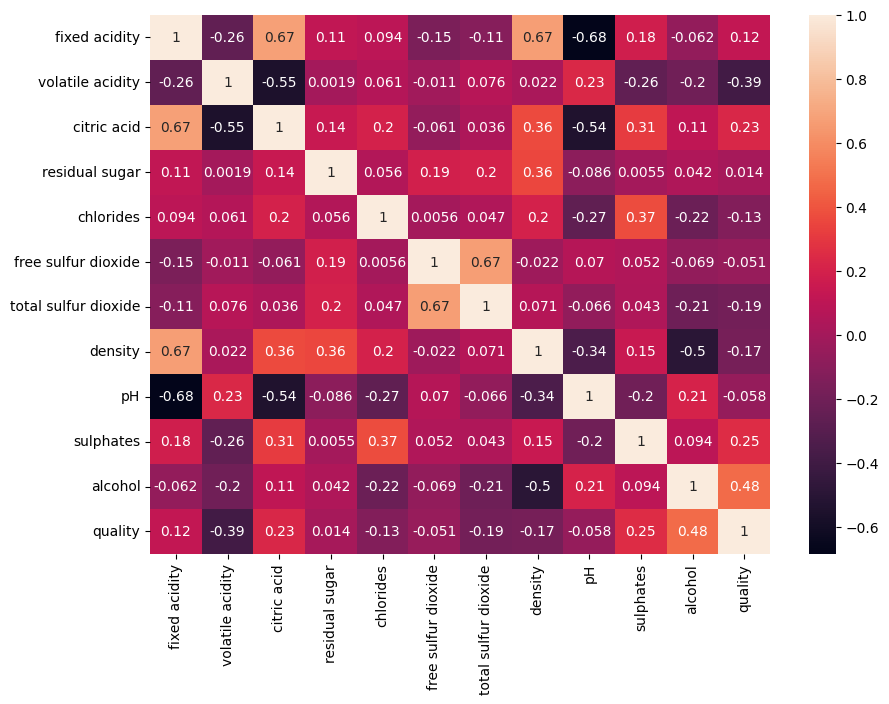

In [13]:
#constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,7))
sns.heatmap(correlation, annot=True)

In [14]:
#printing correlation values
wine_dataset.corr()["quality"].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

> 'alcohol' has higher correlation with target --quality

# Data Preprocessing

In [15]:
#separating the features and label
X= wine_dataset.drop("quality", axis=1)

In [16]:
print(X.head(2))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  
0      9.4  
1      9.8  


**Label Binarization**

In [17]:
Y = wine_dataset["quality"].apply(lambda y_value:1 if y_value>=6.5 else 0)

In [18]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


> So here we have classified the different wine quality ratings to 1 and 0 --GOOD and BAD

# Train & Test Split

In [19]:
#splitting X,Y into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=3) #assigned 20% for test

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


# Model Training

**Model 1 - Logistic Regression**

In [21]:
logreg = LogisticRegression()

In [22]:
#training the model with training data
logreg.fit(X_train, Y_train)

LogisticRegression()

In [23]:
#model evaluation
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, Y_test)
print("Test accuracy score is: ", logreg_acc*100)

Test accuracy score is:  90.3125


**Model 2 - Decision Tree Model**

In [24]:
dtree = DecisionTreeClassifier()

In [25]:
#training the model
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [26]:
#model evaluation
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred, Y_test)
print("Test Accuracy score is:", dtree_acc*100)

Test Accuracy score is: 91.875


**Model 3 - Random Forest Classifier**

In [27]:
rforest = RandomForestClassifier()

In [28]:
#training the model
rforest.fit(X_train, Y_train)

RandomForestClassifier()

In [29]:
#model evaluation
rforest_pred = rforest.predict(X_test)
rforest_acc = accuracy_score(rforest_pred, Y_test)
print("Test Accuracy score is:", rforest_acc*100)

Test Accuracy score is: 92.5


> Conclusion:
> Random Forest has better accuracy than other two models (Logistic Regression and Decision Tree)

# Building a Predictive System

In [30]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
#input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rforest.predict(input_data_reshaped)

print(prediction)

if prediction[0] == 1:
    print("Good Quality Wine!")
else:
    print("Bad Quality Wine")

[1]
Good Quality Wine!


# Saving the model with Pickle

In [31]:
import pickle

In [32]:
pickle.dump(rforest, open("wine_quality_pred_model.pkl", "wb"))

**Database Reference:**

*P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

**Workflow we have followed in this project:**

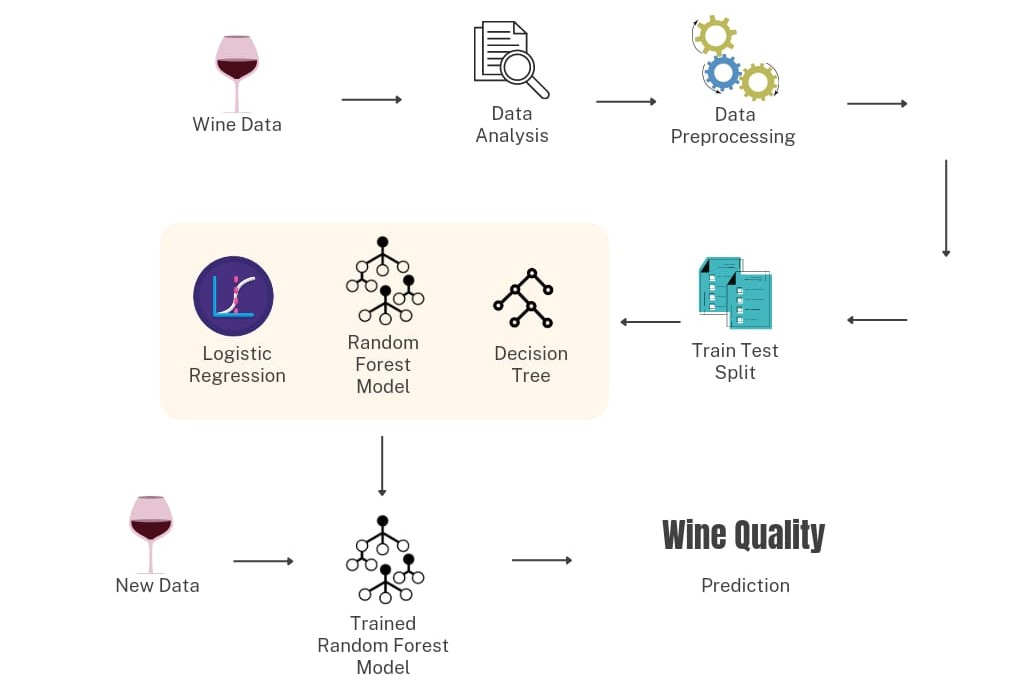